In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


In [4]:
###as 'Sunrisers Hyderabad' was earlier named as 'Deccan Chargers' now to make 
###comparisons lets update both dataframes 

deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches = matches.replace('Deccan Chargers', 'Sunrisers Hyderabad')

# Q1) Who will win the match KXIP vs DC?

In [5]:
# get all matches between KXIP vs srh
srh_kxip = matches[((matches.team1=='Sunrisers Hyderabad')&(matches.team2=='Kings XI Punjab'))|((matches.team2=='Sunrisers Hyderabad')&(matches.team1=='Kings XI Punjab'))]

print(f"Total number of matches between KXIP vs srh : {srh_kxip.shape[0]}")

Total number of matches between KXIP vs srh : 24


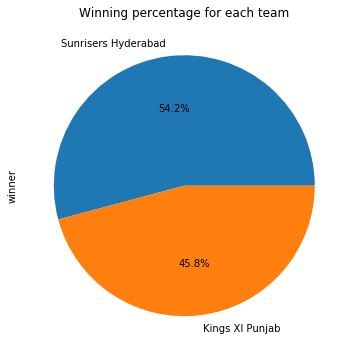

In [7]:
# calculating total wins by each team
srh_kxip.winner.value_counts().plot("pie", autopct = "%1.1f%%", figsize=(20,6))
plt.title("Winning percentage for each team")
plt.show()

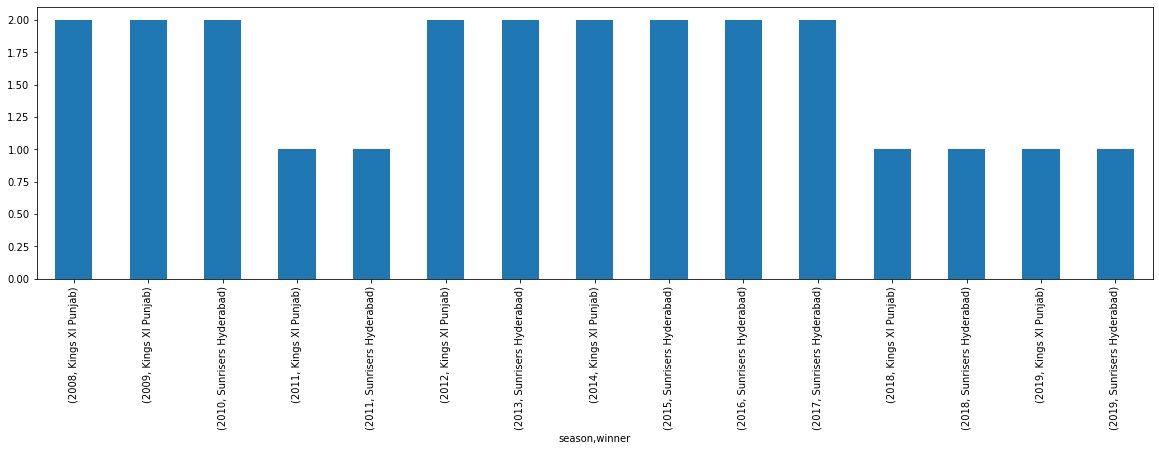

In [8]:
#checking winning percent per season
df_srh_kxip = pd.DataFrame(srh_kxip.groupby('season')['winner'].value_counts())
df_srh_kxip['winner'].plot(kind='bar', figsize=(20,5))

**Inference:**
    SRH and KXIP both are playing almost similar in in season 2020 also overall they have had almost equal number of wins except SRH has slightly higher winning percentage i.e 54.2%

# Q2) Which of the following will be true about David Warner?
    - Out Strike Rate above 125
    - Not out, Strike rate above 125
    - Out, Strike rate below 125
    - Not Out, Strike rate below 125

In [32]:
deliveries[deliveries.batsman=='DA Warner']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
1328,6,2,Sunrisers Hyderabad,Gujarat Lions,1,1,DA Warner,S Dhawan,SK Raina,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [33]:
#get all rows when chris gayles batting for Sunrisers Hyderabad

dw_bats = deliveries[(deliveries.batsman=='DA Warner')&(deliveries.batting_team=='Sunrisers Hyderabad')]

#get all rows when dw plays agains kxip
dwb_kxipf = dw_bats[dw_bats.bowling_team == 'Kings XI Punjab']

#getting how many wickets dw lost
dwb_kxipf[dwb_kxipf.player_dismissed.notnull()]

#all matches played chris gayle batting
dwb_kxipf.dismissal_kind.value_counts()

caught        5
run out       3
bowled        1
hit wicket    1
Name: dismissal_kind, dtype: int64

In [34]:
#check strike rate for gayle


#gettin total balls played
dwb_kxipf_balls = dwb_kxipf.groupby('match_id')['ball'].count().reset_index()

#getting total runse scored per match
dwb_kxipf_scores = dwb_kxipf.groupby('match_id')['batsman_runs'].sum().reset_index()

dwb_kxipf_sr = dwb_kxipf_balls.merge(dwb_kxipf_scores, on='match_id')

dwb_kxipf_sr['strike_rate'] = np.round((dwb_kxipf_sr ['batsman_runs']/dwb_kxipf_sr ['ball'])*100,2)
                                         
dwb_kxipf_sr 

,match_id,ball,batsman_runs,strike_rate
0,19,57,70,122.81
1,32,27,51,188.89
2,466,12,8,66.67
3,496,24,44,183.33
4,544,41,58,141.46
5,564,54,81,150.00
6,594,32,59,184.38
7,622,42,52,123.81
8,11313,63,74,117.46
9,11339,61,91,149.18


In [35]:
dwb_kxipf_sr['strike_rate'].describe()

count     10.000000
mean     142.799000
std       37.695149
min       66.670000
25%      123.060000
50%      145.320000
75%      174.997500
max      188.890000
Name: strike_rate, dtype: float64

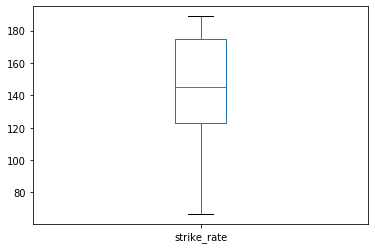

In [36]:
dwb_kxipf_sr['strike_rate'].plot(kind='box')

**Inference:**
    We can see from data that David Warner is a very good player and has a good strike rate as well we can say he might have a strike rate of more than 125 on average and will get out has highest probabilty amongst other options.

# Q3) What will be KL Rahul's contribution to team total?

In [19]:
# getting all matches for kxip vs srh
kxipb_srhf = deliveries[(deliveries.batting_team=='Kings XI Punjab')&(deliveries.bowling_team=='Sunrisers Hyderabad')]

# getting total score of kxip team match wise vs srh
kxipb_srhf_tot = kxipb_srhf.groupby('match_id')['total_runs'].sum().reset_index()

#getting all rows when Shreya Iyer was batting against srh 
krb_srhf = kxipb_srhf[kxipb_srhf.batsman == 'KL Rahul']

#total runs scored by KL Rahul when agains srh match wise
krb_srhf_tot = krb_srhf.groupby('match_id')['batsman_runs'].sum().reset_index()
krb_srhf_tot = krb_srhf_tot.rename(columns={'batsman_runs':'kr_total_runs'}) # changing columnname to avoid confukron

#joining the two data frames will be eakrer for comparison
kxipb_srh_kr_tot = kxipb_srhf_tot.merge(krb_srhf_tot, how='inner', on='match_id')

#as its a left join we might get few null values introduced lets replace them with 0 for eakrer calculations
kxipb_srh_kr_tot = kxipb_srh_kr_tot.fillna(0)

#getting KL Rahuls contribution in total runs scored by team kxip against srh
kxipb_srh_kr_tot['kr_contribution'] = np.round(kxipb_srh_kr_tot.kr_total_runs / kxipb_srh_kr_tot.total_runs,2)*100

print("KL Rahul contribution in total runs scored by team kxip agains srh")
kxipb_srh_kr_tot

KL Rahul contribution in total runs scored by team kxip agains srh


,match_id,total_runs,kr_total_runs,kr_contribution
0,7909,201,18,9.0
1,7918,121,32,26.0
2,11313,152,71,47.0
3,11339,174,84,48.0


In [20]:
kxipb_srh_kr_tot['kr_contribution'].describe()

count     4.00000
mean     32.50000
std      18.66369
min       9.00000
25%      21.75000
50%      36.50000
75%      47.25000
max      48.00000
Name: kr_contribution, dtype: float64

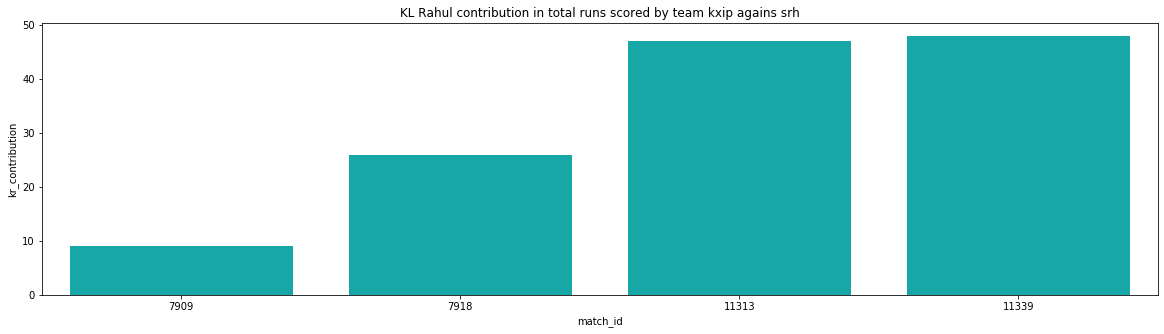

In [25]:
#checking visually
plt.figure(figsize=(20,5))
plt.title("KL Rahul contribution in total runs scored by team kxip agains srh")
sns.barplot(x='match_id', y='kr_contribution', data=kxipb_srh_kr_tot, color='c' )

plt.show()

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


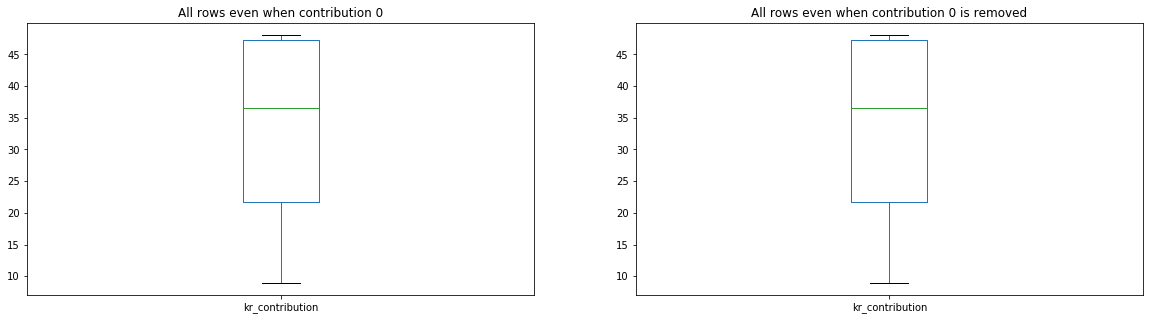

In [27]:
fig, ax=plt.subplots(1,2, figsize=(20,5))
#checking contribution stats
print(kxipb_srh_kr_tot['kr_contribution'].plot('box', ax=ax[0])) # most of the matches has 0 runs so its understood why mean is lesser
ax[0].set_title("All rows even when contribution 0")

#if we remove rows when his contribution was 0
print(kxipb_srh_kr_tot[kxipb_srh_kr_tot.kr_contribution!=0]['kr_contribution'].plot('box', ax=ax[1]))
ax[1].set_title("All rows even when contribution 0 is removed")
plt.show()

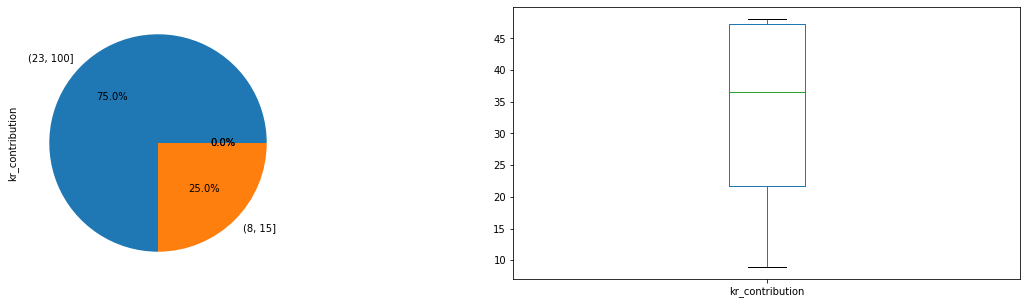

In [30]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
pd.cut(kxipb_srh_kr_tot['kr_contribution'], bins=[0,8,15, 23, 100]).value_counts().plot('pie', autopct='%1.1f%%', ax=ax[0])

(kxipb_srh_kr_tot['kr_contribution'].plot("box", ax=ax[1]))

**Inference:**
    Data suggests that when KL Rahul playing against SRH he has a higher probability of contributing to 23-100% of the scores provided he is not out, if he is out sooner he will be contributing pretty less, and as he is good player the opponents will definitely try to get the wicker sooner.

# Q4) How many balls would SRH take to reach 50 runs on team total

In [50]:
# get all rows when SRH batting KXIP bowling
srhb_kxipf = deliveries[(deliveries.batting_team == 'Sunrisers Hyderabad')&(deliveries.bowling_team == 'Kings XI Punjab')]

# srhb_kxipf_runs_cs = srhb_kxipf.groupby('match_id')['batsman_runs'].apply(lambda x: x.agg(['count', 'sum']))

# srhb_kxipf_runs_cs

srhb_kxipf['total_runs_cumsum'] = srhb_kxipf.groupby('match_id')['total_runs'].cumsum().values

df = srhb_kxipf[['match_id', 'total_runs_cumsum', 'ball']]
df.groupby('match_id')['total_runs_cumsum', 'ball'].agg(['count', sum])

balls_taken = []

#counting balls taken to score 50 runs by SRH team
for m in df['match_id'].unique():
    df1 = df[df.match_id==m]
    
    if df1.total_runs_cumsum.isin(range(50,55)).any():
        df2 = df1[df1.total_runs_cumsum<=50]
        balls_taken.append(df2.shape[0])

print(balls_taken)

[59, 30, 38, 43, 37, 45, 30, 41, 40, 32, 43, 44, 54, 46, 48, 36, 31, 26, 26, 35, 41, 46, 56, 21]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
pd.DataFrame(balls_taken).describe()

,0
count,24.000000
mean,39.500000
std,9.681897
min,21.000000
25%,31.750000
50%,40.500000
75%,45.250000
max,59.000000


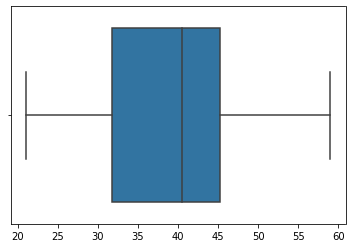

In [52]:
sns.boxplot(balls_taken)

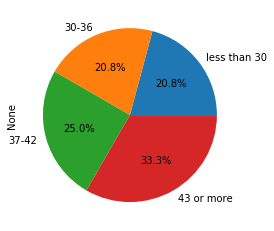

In [55]:
pd.cut(balls_taken, bins = [0,30,37,43,100], labels = ['less than 30', '30-36', '37-42', '43 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - Data suggests highest probability is team might take 43 0r more runs to score 50 but on average it takes around 37-42 balls . As per the historic data if we see how many balls it took for SRH to score 50 runs in total on average around 39 balls so its safe to say they might take 37-42 balls to score 50 runs.

# Q5) How many runs will Chris Gayle score in the first 10 balls he faces? If he gets out before playing 10 balls, then the number of runs he scored will be considered.
    - 0-10
    - 11-18
    - 18 - 26
    - 27 or more

In [60]:
# get all matches when CH Gayle  bats against srh
cgb_srhf = deliveries[(deliveries.batsman == 'CH Gayle')&(deliveries.bowling_team=='Sunrisers Hyderabad')]

runs_first10=[]
for m in cgb_srhf.match_id.unique():
      #getting first 10 balls if got out before balls until out
    df = (cgb_srhf[cgb_srhf.match_id == m][:10])
    
    #get only rows when scored off boundaries
    runs_first10.append(df[df.batsman_runs.isin([4,6])]['batsman_runs'].sum())


In [61]:
pd.DataFrame(runs_first10).describe()

,0
count,17.000000
mean,9.058824
std,8.806749
min,0.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,34.000000


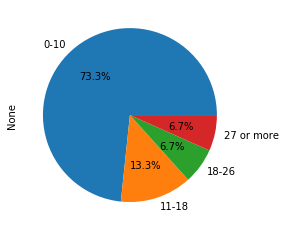

In [63]:
pd.cut(runs_first10, bins=[0,11,18,27,100], labels=['0-10', '11-18', '18-26', '27 or more']).value_counts().plot("pie", autopct='%1.1f%%')

**Inference:**
    - We can see that in most of matches he was caught out sooner however in first 10 balls on average he scored around 9 runs which is still less than 10. 